# Import dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USA_Housing.csv')

# EDA

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:>

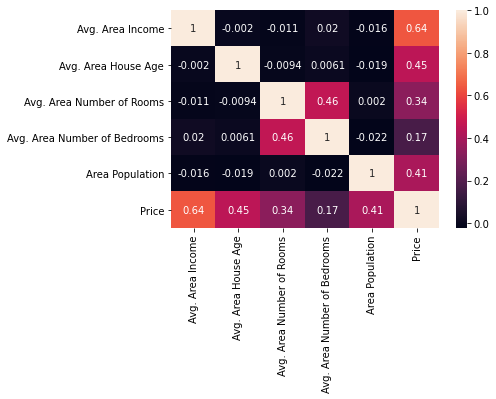

In [6]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'regression line')

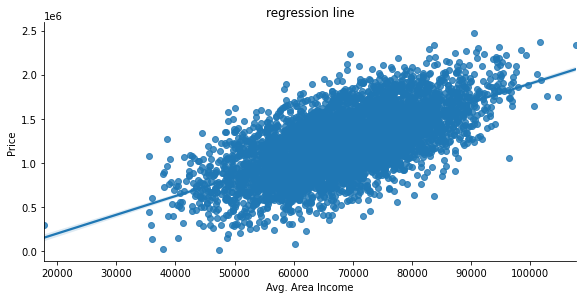

In [7]:
sns.lmplot(x='Avg. Area Income', y='Price', data=df, aspect=2, height=4)
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('regression line')

# Data preprocessing

In [8]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model building

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [12]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])

In [13]:
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


# Prediction

In [14]:
y_pred = lin_reg.predict(x_test)

# Evaluation

In [15]:
sse = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('calculated R square is: ', R_square)

calculated R square is:  0.9146818498754016


In [16]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test, y_pred)
print('sklearn R square is: ', R_square)

sklearn R square is:  0.9146818498754016


# Statsmodel

In [17]:
import statsmodels.api as sm
x = sm.add_constant(x)
lin_reg_sm = sm.OLS(y,x).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:55:09   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg. Area Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg. Area House Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area Population                 15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""